In [63]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [64]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [65]:
def scaler_split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    return x_train, x_test, y_train, y_test 

In [66]:
def kpca(x_train, x_test, n):
    kpca = KernelPCA(n_components = n, kernel = 'rbf')
    x_train_kpca = kpca.fit_transform(x_train)
    x_test_kpca = kpca.transform(x_test)
    return x_train_kpca, x_test_kpca

In [67]:
def cm_prediction(classifier, x_test_kpca):
    y_pred = classifier.predict(x_test_kpca)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return classifier, accuracy, report, x_test_kpca, y_test, cm

In [68]:
def logistic(x_train_kpca,y_train,x_test_kpca):       
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x_train_kpca, y_train)
    classifier,accuracy,report,x_test_kpca,y_test,cm = cm_prediction(classifier,x_test_kpca)
    return  classifier,accuracy,report,x_test_kpca,y_test,cm   

In [69]:
def svm_linear(x_train_kpca, y_train, x_test_kpca):
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(x_train_kpca, y_train)
    classifier, accuracy, report, x_test_kpca, y_test, cm = cm_prediction(classifier, x_test_kpca) 
    return  classifier,accuracy,report,x_test_kpca,y_test,cm  

In [70]:
def svm_nl(x_train_kpca, y_train, x_test_kpca):
    classifier = SVC(kernel = 'rbf', random_state = 0)
    classifier.fit(x_train_kpca, y_train)
    classifier, accuracy, report, x_test_kpca, y_test, cm = cm_prediction(classifier, x_test_kpca) 
    return  classifier,accuracy,report,x_test_kpca,y_test,cm    

In [71]:
def knn(x_train_kpca, y_train, x_test_kpca):
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(x_train_kpca, y_train)
    classifier, accuracy, report, x_test_kpca, y_test, cm = cm_prediction(classifier, x_test_kpca)
    return  classifier,accuracy,report,x_test_kpca,y_test,cm   

In [72]:
def naive(x_train_kpca, y_train, x_test_kpca):
    classifier = GaussianNB()
    classifier.fit(x_train_kpca, y_train)
    classifier, accuracy, report, x_test_kpca, y_test, cm = cm_prediction(classifier, x_test_kpca)
    return  classifier,accuracy,report,x_test_kpca,y_test,cm   

In [73]:
def decision(x_train_kpca, y_train, x_test_kpca):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(x_train_kpca, y_train)
    classifier, accuracy, report, x_test_kpca, y_test, cm = cm_prediction(classifier, x_test_kpca) 
    return  classifier,accuracy,report,x_test_kpca,y_test,cm   

In [74]:
def random(x_train_kpca, y_train, x_test_kpca):
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(x_train_kpca, y_train)
    classifier, accuracy, report, x_test_kpca, y_test, cm = cm_prediction(classifier, x_test_kpca) 
    return  classifier,accuracy,report,x_test_kpca,y_test,cm   

In [75]:
def kpca_classification(acclog, accsvml, accsvmnl, accknn, accnaive, accdeci, accrand):
    dataframe = pd.DataFrame(index = ['kpca'], columns = ['Logistic', 'SVML', 'SVMNL', 'KNN', 'Naive', 'Decision', 'Random'])
    for number, item in enumerate(dataframe.index):       # Enumerate - it is a counter that adds index to each items in an iterable
        dataframe['Logistic'][item] = acclog[number]
        dataframe['SVML'][item] = accsvml[number]
        dataframe['SVMNL'][item] = accsvmnl[number]
        dataframe['KNN'][item] = accknn[number]
        dataframe['Naive'][item] = accnaive[number]
        dataframe['Decision'][item] = accdeci[number]
        dataframe['Random'][item] = accrand[number]
    return dataframe        

In [76]:
dataset = pd.read_csv('Employee_Attrition_Dataset.csv', index_col = None)  # index_col - keep the default index not allowing the input to reset the index position
dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [77]:
# dataset.drop(['EmployeeCount', 'EmployeeNumber','StandardHours'], axis = 1, inplace = True)

In [78]:
df1 = pd.get_dummies(dataset, dtype = int, drop_first = True)
df1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [79]:
# Input and Output Split
x = df1.drop("Attrition_Yes", axis =1)
y = df1['Attrition_Yes']

In [80]:
acclog = []
accsvml = []
accsvmnl = []
accknn = []
accnaive = []
accdeci = []
accrand = []
n_components_list = []

In [81]:
x_train, x_test, y_train, y_test = scaler_split(x, y)

In [82]:
for n in range(1,34):
    x_train_kpca, x_test_kpca = kpca(x_train, x_test, n)
    
    classifier, accuracy, report, x_test_kpca, y_test,cm = logistic(x_train_kpca,y_train,x_test_kpca)
    acclog.append(accuracy)
    
    classifier, accuracy, report, x_test_kpca, y_test, cm = svm_linear(x_train_kpca, y_train, x_test_kpca)
    accsvml.append(accuracy)
    
    classifier, accuracy, report, x_test_kpca, y_test, cm = svm_nl(x_train_kpca, y_train, x_test_kpca)
    accsvmnl.append(accuracy)
    
    classifier, accuracy, report, x_test_kpca, y_test, cm = knn(x_train_kpca, y_train, x_test_kpca)
    accknn.append(accuracy)
    
    classifier, accuracy, report, x_test_kpca, y_test, cm = naive(x_train_kpca, y_train, x_test_kpca)
    accnaive.append(accuracy)
    
    classifier, accuracy, report, x_test_kpca, y_test, cm = decision(x_train_kpca, y_train, x_test_kpca)
    accdeci.append(accuracy)
    
    classifier, accuracy, report, x_test_kpca, y_test, cm = random(x_train_kpca, y_train, x_test_kpca)
    accrand.append(accuracy)

    n_components_list.append(n)

In [84]:
results_df = pd.DataFrame({
    'KPCA': n_components_list,
    'Logistic': acclog,
    'SVML': accsvml,
    'SVMNL': accsvmnl,
    'KNN'  : accknn,
    'Naive': accnaive,
    'Decision': accdeci,
    'Random': accrand
})


results_df.set_index('KPCA', inplace=True)

# Print the final result table
print(results_df)

      Logistic     SVML     SVMNL       KNN     Naive  Decision    Random
KPCA                                                                     
1     0.841270  0.84127  0.841270  0.809524  0.841270  0.732426  0.748299
2     0.841270  0.84127  0.841270  0.798186  0.841270  0.748299  0.793651
3     0.841270  0.84127  0.841270  0.811791  0.845805  0.755102  0.834467
4     0.843537  0.84127  0.848073  0.825397  0.852608  0.736961  0.836735
5     0.843537  0.84127  0.845805  0.841270  0.841270  0.780045  0.825397
6     0.843537  0.84127  0.845805  0.818594  0.841270  0.780045  0.834467
7     0.843537  0.84127  0.848073  0.839002  0.845805  0.786848  0.857143
8     0.843537  0.84127  0.848073  0.832200  0.843537  0.793651  0.843537
9     0.848073  0.84127  0.845805  0.834467  0.843537  0.786848  0.848073
10    0.841270  0.84127  0.852608  0.825397  0.852608  0.816327  0.832200
11    0.841270  0.84127  0.845805  0.829932  0.857143  0.798186  0.852608
12    0.841270  0.84127  0.852608  0.8

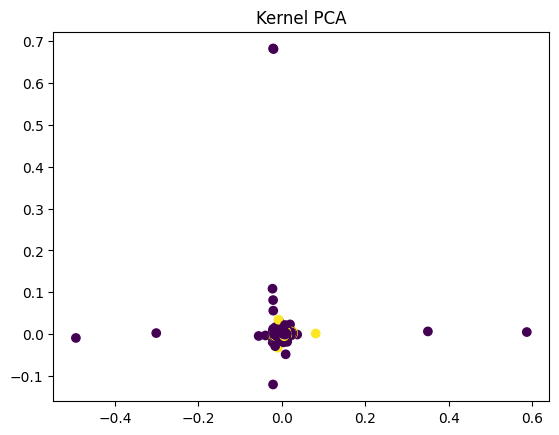

In [87]:
import matplotlib.pyplot as plt
kpca = KernelPCA(kernel = 'rbf', gamma = 10)
x_kpca = kpca.fit_transform(x)
plt.title('Kernel PCA')
plt.scatter(x_kpca[:,0], x_kpca[:,1], c= y)
plt.show()